# <center>Table of Contents
* Intent and motivation behind the project

* Detail description of steps taken

* Conclusion and Outlines

# <center><b>Intent and motivation behind the project</b></center>
Some time ago I learned about the convolutional neural network ResNet50, which is trained on millions of images of different objects distributed in 1000 different classes. The model is trained for 50 deep layers and the weight of the already trained model is openly available for further use according to our own problem statement. I was curious if these model parameters can be used to classify people. To satisfy my curiosity, I plan to take some pictures of Tom Cruise and Tom Hanks and use this model. This is a fun project for me, but it helped me learn a lot of things. In the following, the description of the code cell is provided just above the code cell.

<font style='color:green'>Below I extract Images from a video file and the video is downloaded from YouTube. The youtube-dl package is used to download the video, but it is not already installed. Therefore, youtube-dl is downloaded as follows. First, try importing youtube-dl and if it doesn't appear in the system, it will installed using pip command. In addition, all necessary modules are imported in the subsequent code cell.</font>

In [ ]:
%%capture

try:
  import youtube_dl
except:
  !pip install youtube-dl  

In [ ]:
#Import necessary libraries for the neural network
import tensorflow as tf
from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#Library or module for data manipulation
import numpy as np

#Library for visulization purpose
import matplotlib.pyplot as plt
import PIL

#To import data via url
import pathlib

#To read the picture, this model also has many great features
#Which is not explore here
import cv2
import os, shutil
#To download video from YouTube
# import youtube-dl

<font size='4'>Video url taken from YouTube and command similar to linux terminal is used below. Here ! before youtube-dl is to indicate that it should run like in the terminal and format (-f) 18 means choose the second best quality of mp4 video. !youtube-dl -f shows all possible formats. </font>

In [ ]:
# %%capture
video_url      = 'https://www.youtube.com/watch?v=WO8Mv5NOs1k'
!youtube-dl -f 18 https://www.youtube.com/watch?v=WO8Mv5NOs1k

[youtube] WO8Mv5NOs1k: Downloading webpage
[youtube] WO8Mv5NOs1k: Downloading MPD manifest
[download] Destination: Top 100 Images Of Tom Cruise-WO8Mv5NOs1k.mp4
[download] 100% of 25.10MiB in 06:40


In [ ]:
# %%capture
!youtube-dl -f 18 https://www.youtube.com/watch?v=qt4fU0HRrAY

[youtube] qt4fU0HRrAY: Downloading webpage
[download] Destination: Tom Hanks - A Life In Pictures-qt4fU0HRrAY.mp4
[download] 100% of 56.99MiB in 14:44


<font size='4'>The following code first checks whether the necessary directory exists or not. If the search directory is not found, a new one is created. To complete this, path.exists() and rmtree() methods from os and shutil are used. </font>

In [ ]:
pathCruise = '/content/Images/TomCruise/'
os.path.exists(pathCruise)

if os.path.exists(pathCruise) == True:
  shutil.rmtree(pathCruise)

os.makedirs(pathCruise)  

####The cv2 module is used to read and write the images from a video file.

* First video is opened using cv2.VideoCapture() method.

* If video is opened (video.isOpened) then read the frame (images).

* If problem is occurred or frame is reached to the last value then break the loop (if success == False:break). 

* Write images using cv2.imwrite(path_where_to_saved, image/frame)

* At the moment only 5000 images are stored. As a result, the loop is broken if count > 5000.

* The same process as explained above takes place in the following next two code cells.

In [ ]:
#Open the video file
video     = cv2.VideoCapture('Top 100 Images Of Tom Cruise-WO8Mv5NOs1k.mp4')
countCruise = 0
while video.isOpened():
  success,frame = video.read()
  if success == False:
    break

  cv2.imwrite(pathCruise+str(countCruise)+'.jpg',frame)
  countCruise += 1 

  if countCruise > 5000:break

video.release()
cv2.destroyAllWindows()
print(f'There are {countCruise} images in the {pathCruise} directory')

There are 5001 images in the /content/Images/TomCruise/ directory


In [ ]:
pathHanks = '/content/Images/TomHanks/'
if os.path.exists(pathHanks) == True:
  shutil.rmtree(pathHanks)
    
os.makedirs(pathHanks)

In [ ]:
video     = cv2.VideoCapture('Tom Hanks - A Life In Pictures-qt4fU0HRrAY.mp4')
countHanks = 0
while video.isOpened():
  success,frame = video.read()
  if success == False:
    break

  cv2.imwrite(pathHanks+str(countHanks)+'.jpg',frame)
  countHanks += 1 
  
  if countHanks == countCruise:break

video.release()
cv2.destroyAllWindows()
print(f'There are {countHanks} images in the {pathHanks} directory')

There are 5001 images in the /content/Images/TomHanks/ directory


<font size='4'>
<b>The os.listdir() method is used to create a list of all content in the specified path.</b>
</font>

In [ ]:
imagesCruise = os.listdir(pathCruise)
imagesHanks  = os.listdir(pathHanks)
imagesCruise[:10], imagesHanks[:10]

(['2011.jpg',
  '1153.jpg',
  '2986.jpg',
  '3568.jpg',
  '1738.jpg',
  '942.jpg',
  '3803.jpg',
  '3964.jpg',
  '876.jpg',
  '2074.jpg'],
 ['2011.jpg',
  '1153.jpg',
  '2986.jpg',
  '3568.jpg',
  '1738.jpg',
  '942.jpg',
  '3803.jpg',
  '3964.jpg',
  '876.jpg',
  '2074.jpg'])

In [ ]:
print(f'There are {len(imagesCruise)} images of Tom Cruise in the {pathCruise} directory')
print(f'There are {len(imagesHanks)} images of Tom Hanks in {pathHanks} directory')

There are 5001 images of Tom Cruise in the /content/Images/TomCruise/ directory
There are 5001 images of Tom Hanks in /content/Images/TomHanks/ directory


In [ ]:
pathCruise, pathHanks

'/content/Images/TomCruise/'

<font size='4'>
The first image from the directory is plotted using PIL.Image.open('Path to the image') method
</font>

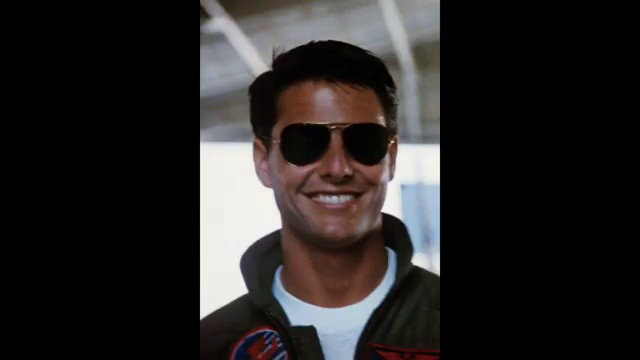

In [ ]:
imagesCruise = os.listdir(pathCruise)
PIL.Image.open(pathCruise+imagesCruise[0])

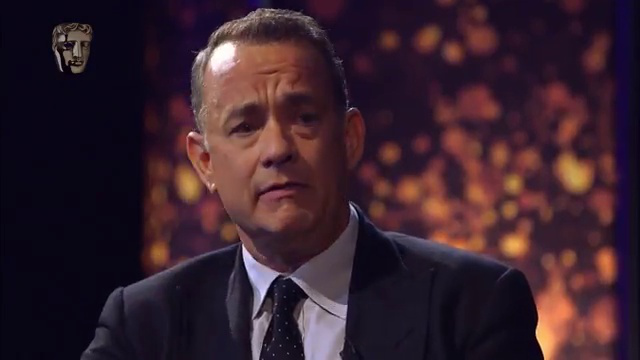

In [ ]:
PIL.Image.open(pathHanks+imagesHanks[0])

<font size='4'>
In the following
</font>

* Image are resized to (180,180) pixels

* The tf.keras.preprocessing.image_dataset_from_directory() method is used to create the data for training and validating the model. Using this method, only the path to the images needs to be specified and there needs to be a number of subdirectories corresponding to the different classes.

* The label_mode='categorical' because is data divided into two category. Based on this information later labels are converted into numbers like in the label_encoder() method.

* The subset='Training' is optional and only needs to be specified if the data is also subdivided into the validation.

* The validation_split = 0.2 implies that 20% data is reserved for the validation purpose.

In [ ]:
path = '/content/Images'
img_height, img_width = 180,180
img_size = (img_height, img_width)
batch_size = 32
image_dataset_from_directory = tf.keras.preprocessing.image_dataset_from_directory

train_dir = image_dataset_from_directory(path,
                                         label_mode='categorical',
                                         subset = 'training',
                                         seed =123,
                                         validation_split =0.2,
                                         image_size=img_size,
                                         batch_size=batch_size )


validation_dir = image_dataset_from_directory(path,
                                         label_mode='categorical',
                                         subset = 'validation',
                                         seed =123,
                                         validation_split =0.2,
                                         image_size=img_size,
                                         batch_size=batch_size )

Found 10002 files belonging to 2 classes.
Using 8002 files for training.
Found 10002 files belonging to 2 classes.
Using 2000 files for validation.


The resized images are visualized in the follwoing.

* The canvas size is set up using plt.figure(figsize=())

* For all images and labels in train_dir.take(1) and only 8 (the second for loop) images are displayed.

* plt.subplot(4,4,index) => canvas is splitted into 4 rows and 4 columns. The last argument specifies the position of the image to fill.

* plt.imshow() takes an array as an argument to display an image. Therefore, an image is converted to a numpy array as images[].numpy() and the pixel value is converted to an 8-bit integer as images[].numpy().astype('uint8').

* The labels are converted to numbers. In this example, there are only two classes, so labels are either [1.,0.] (TomCruise) and [0.,1.] (TomHanks).

* np.argmax([1.,0.]) = 0 (maximum argument at the 0th positon) and ['TomCruise','TomHanks'][np.argmax([1.,0.])] = 'TomCruise' 

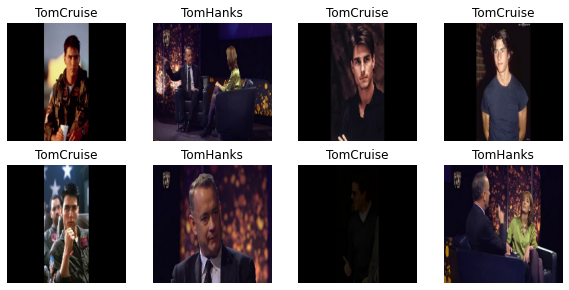

In [ ]:
classnames = train_dir.class_names

plt.figure(figsize=(10,10))
for images, labels in train_dir.take(1):
  for index in range(8):
    ax = plt.subplot(4,4,index+1)
    plt.imshow(images[index].numpy().astype('uint8'))
    plt.title(classnames[np.argmax(labels[index])])
    plt.axis('off')

<center> <font size='5'> <b>Build Model</b> </font>
</center>

* From the keras applications, ResNet50 is used

* The top most layer or the outer layer is not include and   two additional layers are going to be attached later.

* The input shape is optional argument and only has to be specified if include_top is False. The input shape has to be either (height,width, channel) (channel last format) or (channel, height,width) (channel first format). It should have exactly 3 input channel and pixels size should not be less than (32x32).

* The pooling='avg' means that from the last convolutional layers, the gobal average pooling is used.

* classes = number of class in our data set

* weight = 'imagenet' implies that the weight of the pretraining on ImageNet



In [ ]:
resNet50_model = Sequential()

class_len = len(classnames)

ResNet50 = tf.keras.applications.ResNet50  
already_trained_model = ResNet50(include_top=False,
                                 input_shape=(img_height,img_width,3),
                                 pooling='avg',
                                 classes=class_len,
                                 weights='imagenet')

for layer in already_trained_model.layers:
  layer.trainable = False

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resNet50_model.add(already_trained_model)
resNet50_model.add(Flatten())
resNet50_model.add( Dense(256,activation='relu') )
resNet50_model.add( Dense(2,activation='softmax') )

In [ ]:
resNet50_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24,112,770
Trainable params: 525,058
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

resNet50_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history = resNet50_model.fit(train_dir,validation_data=validation_dir,epochs=5,callbacks=[callback])

Epoch 1/5
251/251 [==============================] - 1094s 4s/step - loss: 3.5926e-04 - accuracy: 0.9999 - val_loss: 2.5972e-07 - val_accuracy: 1.0000
Epoch 2/5
251/251 [==============================] - 1077s 4s/step - loss: 1.4350e-07 - accuracy: 1.0000 - val_loss: 1.5663e-07 - val_accuracy: 1.0000
Epoch 3/5
251/251 [==============================] - 1079s 4s/step - loss: 8.4936e-08 - accuracy: 1.0000 - val_loss: 1.0911e-07 - val_accuracy: 1.0000
Epoch 4/5
251/251 [==============================] - 1079s 4s/step - loss: 5.7008e-08 - accuracy: 1.0000 - val_loss: 8.2761e-08 - val_accuracy: 1.0000
Epoch 5/5
251/251 [==============================] - 1077s 4s/step - loss: 4.1528e-08 - accuracy: 1.0000 - val_loss: 6.6304e-08 - val_accuracy: 1.0000


In [ ]:
history.history

{'loss': [0.0003592618159018457,
  1.4350027299769863e-07,
  8.493564962464006e-08,
  5.7008300302641146e-08,
  4.1527794536477813e-08],
 'accuracy': [0.999875009059906, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [2.597220714051218e-07,
  1.56633461756428e-07,
  1.0910658687635078e-07,
  8.276116858496607e-08,
  6.63043024928811e-08],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [ ]:
resNet50_model.save('Tom_Cruise_Hanks.h5')

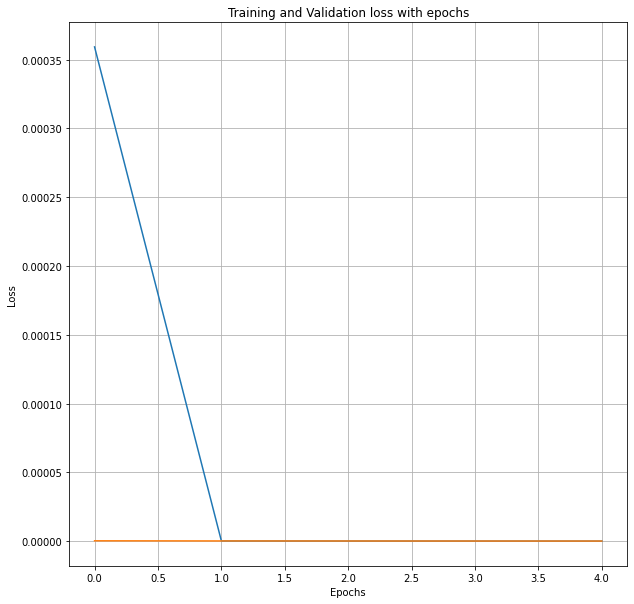

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss with epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()

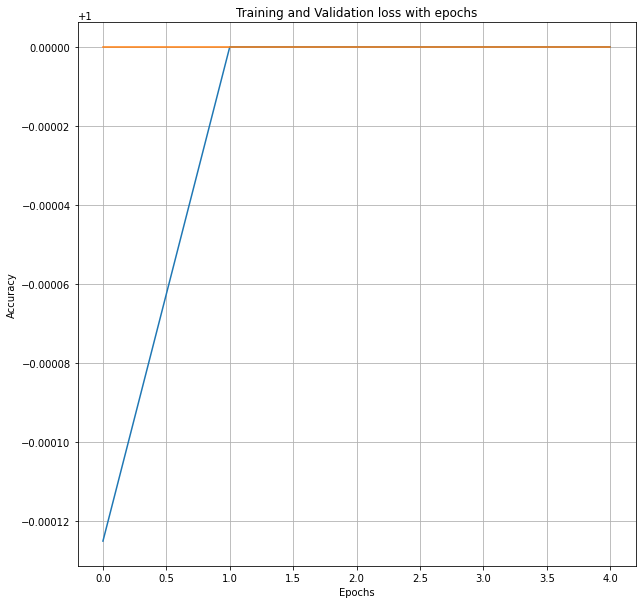

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation loss with epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()

In [ ]:
!wget https://cdn.gobankingrates.com/wp-content/uploads/2022/05/shutterstock_editorial_12946411ci-1.jpg?w=675&quality=75

--2022-08-16 08:01:18--  https://cdn.gobankingrates.com/wp-content/uploads/2022/05/shutterstock_editorial_12946411ci-1.jpg?w=675
Resolving cdn.gobankingrates.com (cdn.gobankingrates.com)... 108.156.91.15, 108.156.91.99, 108.156.91.127, ...
Connecting to cdn.gobankingrates.com (cdn.gobankingrates.com)|108.156.91.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25378 (25K) [image/jpeg]
Saving to: ‘shutterstock_editorial_12946411ci-1.jpg?w=675’

shutterstock_editor 100%[===================>]  24.78K  --.-KB/s    in 0.01s   

2022-08-16 08:01:20 (2.41 MB/s) - ‘shutterstock_editorial_12946411ci-1.jpg?w=675’ saved [25378/25378]



The person in the photo is TomHanks


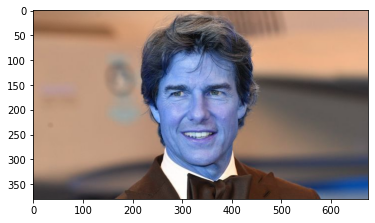

In [ ]:
image        = cv2.imread('imageTC.jpg')
plt.imshow(image)
resize_iamge = cv2.resize(image,(img_height,img_width))
image        = np.expand_dims(resize_iamge,axis=0)
prediction   = resNet50_model.predict(image) 
ouput_class  = classnames[np.argmax(prediction)]

print(f'The person in the photo is {ouput_class}')

The person in the photo is TomHanks


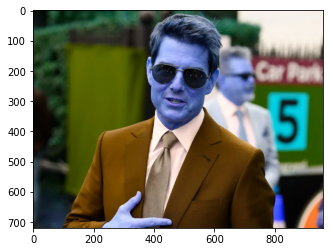

In [ ]:
image        = cv2.imread('imageTC2.webp')
plt.imshow(image)
resize_iamge = cv2.resize(image,(img_height,img_width))
image        = np.expand_dims(resize_iamge,axis=0)
prediction   = resNet50_model.predict(image) 
ouput_class  = classnames[np.argmax(prediction)]

print(f'The person in the photo is {ouput_class}') pathCruise+imagesCruise[0]

The person in the photo is TomCruise


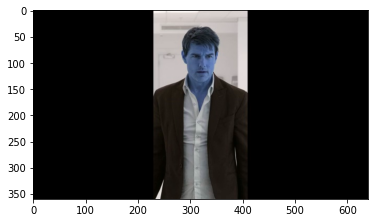

In [ ]:
image        = cv2.imread(pathCruise+imagesCruise[0])
plt.imshow(image)
resize_iamge = cv2.resize(image,(img_height,img_width))
image        = np.expand_dims(resize_iamge,axis=0)
prediction   = resNet50_model.predict(image) 
ouput_class  = classnames[np.argmax(prediction)]

print(f'The person in the photo is {ouput_class}') 

The person in the photo is TomHanks


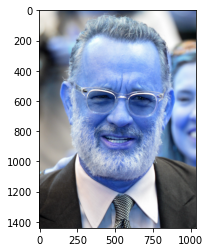

In [ ]:
image        = cv2.imread('imageTH.jpg')
plt.imshow(image)
resize_iamge = cv2.resize(image,(img_height,img_width))
image        = np.expand_dims(resize_iamge,axis=0)
prediction   = resNet50_model.predict(image) 
ouput_class  = classnames[np.argmax(prediction)]

print(f'The person in the photo is {ouput_class}')

# <center> <b>Convolutional Neural Network From Scratch</b>
<center> Above, I used weight for the deep layers from the ResNet50 model hosted using the Keras API. Here I don't use those preset weights, but instead train the model from scratch for a few layers and compare how the result differs. Some steps appear to be repetitive, but they are included to maintain continuity. The previous calculations were done with resized pixels of 180x180, but when I use this to train the model from scratch I get 16 million trainable parameters. Therefore, to speed up the calculation, the pixel size is reduced to 100x100. </center>

In [3]:
!ls

sample_data


In [168]:
pathTestImagesCruise = '/content/TestimagesCruise/' 
if os.path.exists(pathTestImagesCruise) == True:
  shutil.rmtree(pathTestImagesCruise)

os.makedirs(pathTestImagesCruise)  

pathCruise = '/content/Images/TomCruise/'
os.path.exists(pathCruise)

if os.path.exists(pathCruise) == True:
  shutil.rmtree(pathCruise)

os.makedirs(pathCruise)  

#Open the video file
video     = cv2.VideoCapture('Top 100 Images Of Tom Cruise-WO8Mv5NOs1k.mp4')
countCruise = 0
while video.isOpened():
  success,frame = video.read()
  if success == False:
    break
  
  
  if countCruise < 24000:
    cv2.imwrite(pathCruise+str(countCruise)+'.jpg',frame)
  else:
    cv2.imwrite(pathTestImagesCruise+str(countCruise)+'.jpg',frame)

  countCruise += 1 

  # if countCruise > 5000:break

video.release()
cv2.destroyAllWindows()
print(f'There are {len(os.listdir(pathCruise))} images in the {pathCruise} directory')

There are 24500 images in the /content/Images/TomCruise/ directory


In [178]:
pathTestImagesHanks = '/content/TestimagesHanks/' 
if os.path.exists(pathTestImagesHanks) == True:
  shutil.rmtree(pathTestImagesHanks)

os.makedirs(pathTestImagesHanks)

pathHanks = '/content/Images/TomHanks/'
if os.path.exists(pathHanks) == True:
  shutil.rmtree(pathHanks)
    
os.makedirs(pathHanks)

video     = cv2.VideoCapture('Tom Hanks - A Life In Pictures-qt4fU0HRrAY.mp4')
countHanks = 0
while video.isOpened():
  success,frame = video.read()
  if success == False:
    break
  
  if countHanks < 24000:
    cv2.imwrite(pathHanks+str(countHanks)+'.jpg',frame)
  else:
    cv2.imwrite(pathTestImagesHanks+str(countHanks)+'.jpg',frame)  


  countHanks += 1 
  
  if countHanks == countCruise:break  

video.release()
cv2.destroyAllWindows()

print(f'There are {len(os.listdir(pathHanks))} images in the {pathHanks} directory')

There are 24000 images in the /content/Images/TomHanks/ directory


In [170]:
import pandas as pd

data = pd.DataFrame({'Tom Cruise':len(os.listdir(pathCruise)),
                     'Tom Hanks':len(os.listdir(pathHanks))},index=[0])

print(f'There are {len(os.listdir(pathCruise))} images of Tom Cruise in the {pathCruise} directory')
print(f'There are {len(os.listdir(pathHanks))} images of Tom Hanks in {pathHanks} directory')

data.T

There are 24000 images of Tom Cruise in the /content/Images/TomCruise/ directory
There are 24000 images of Tom Hanks in /content/Images/TomHanks/ directory


,0
Tom Cruise,24000
Tom Hanks,24000


<b>I just want to add one thing here. In Google Colab, wherever a file or directory is replaced, the system adds the .ipynb_checkpoints file. When a directory appears in the images directory, our model thinks it's a different class and tries to assign a label. Which later causes a problem when the model tries to be fit. As a result, such a file should be removed from the system. This file is difficult to remove just by right-clicking, but possible with the rm command </b>

In [171]:
path = '/content/Images'

# img_height, img_width = 180,180  
img_height, img_width = 100,100
img_size = (img_height, img_width)
batch_size = 32
image_dataset_from_directory = tf.keras.preprocessing.image_dataset_from_directory

train_dir = image_dataset_from_directory(path,
                                         label_mode='categorical',
                                         subset = 'training',
                                         seed =123,
                                         validation_split =0.2,
                                         image_size=img_size,
                                         batch_size=batch_size )


validation_dir = image_dataset_from_directory(path,
                                         label_mode='categorical',
                                         subset = 'validation',
                                         seed =123,
                                         validation_split =0.2,
                                         image_size=img_size,
                                         batch_size=batch_size )

classnames = train_dir.class_names

Found 48000 files belonging to 2 classes.
Using 38400 files for training.
Found 48000 files belonging to 2 classes.
Using 9600 files for validation.


<font size='4'>

* Here I build the model. There are two layers of convolution with 32, 64, and 128 filters respectively. The size of a filter is a 3x3 matrix assigned by the kernal size keyword. The activation function used for the convolutional layers is relu and for the first layer the input size is given. After each convolution layer, the maxpooling layer is deployed, so features highlighted by the convolution layer are preserved by the maxpooling layers.

* A dropout layer is used to deactivate on some neurons. This is often used to prevent the overfitting problem.
</font>

In [191]:
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D
from random import shuffle

cnn_model = Sequential()

cnn_model.add( Conv2D( filters=32,
                      kernel_size = (3,3),
                      activation  = tf.nn.relu,
                      input_shape = (img_height,img_width,3) ) )

cnn_model.add( MaxPooling2D(pool_size=(2,2) ) )  

cnn_model.add( Conv2D( filters    = 64,
                      kernel_size = (3,3),
                      activation  = tf.nn.relu )  )

cnn_model.add( Dropout(0.25) )

cnn_model.add( MaxPooling2D( pool_size=(2,2) ) )

cnn_model.add( Conv2D( filters    = 128,
                      kernel_size = (3,3),
                      activation  = tf.nn.relu )  )

cnn_model.add( MaxPooling2D( pool_size=(2,2) ) )


cnn_model.add( Dropout(0.25) )

cnn_model.add( Flatten() )

cnn_model.add( Dense(128,activation = 'relu') )
cnn_model.add( Dense(2,  activation = 'softmax') )

cnn_model.summary()
cnn_model.compile( optimizer = Adam(learning_rate=0.005),
                  loss       = 'binary_crossentropy',
                  metrics    = ['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 dropout_18 (Dropout)        (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 128)     

In [173]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001, patience=3)

In [174]:
history = cnn_model.fit(train_dir,validation_data=validation_dir,epochs=10,callbacks=[callback])

Epoch 1/10
1200/1200 [==============================] - 63s 52ms/step - loss: 1.4746 - accuracy: 0.9973 - val_loss: 8.2607e-18 - val_accuracy: 1.0000
Epoch 2/10
1200/1200 [==============================] - 62s 51ms/step - loss: 1.7713e-21 - accuracy: 1.0000 - val_loss: 8.2518e-18 - val_accuracy: 1.0000
Epoch 3/10
1200/1200 [==============================] - 62s 51ms/step - loss: 1.4133e-19 - accuracy: 1.0000 - val_loss: 8.2518e-18 - val_accuracy: 1.0000
Epoch 4/10
1200/1200 [==============================] - 61s 50ms/step - loss: 1.7974e-21 - accuracy: 1.0000 - val_loss: 8.2518e-18 - val_accuracy: 1.0000
Epoch 5/10
1200/1200 [==============================] - 63s 52ms/step - loss: 1.7642e-21 - accuracy: 1.0000 - val_loss: 8.2518e-18 - val_accuracy: 1.0000


In [122]:
os.listdir('/content/Images/')
# !rm -r '/content/Images/.ipynb_checkpoints'

['TomHanks', 'TomCruise']

In [127]:
cnn_model.save('convolutional_network_TH_TC_All_Images.h5')

In [150]:
labels = ['Training Loss','Validation Loss']
plt.figure(figsize=(8,8))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Change of Training Loss and Validation Loss with Epochs')
plt.plot(history.history['loss'],label=labels[0])
plt.plot(history.history['val_loss'],label=labels[1])
plt.legend()
plt.grid()

In [149]:
labels = ['Training Accuracy','Validation Accuracy']
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Change of Training Loss and Validation Loss with Epochs')
plt.plot(history.history['accuracy'],label=labels[0])
plt.plot(history.history['val_accuracy'],label=labels[1])
plt.legend()
plt.grid()

In [151]:
cnn_model.compile( optimizer = tf.keras.optimizers.SGD(),
                  loss       = 'binary_crossentropy',
                  metrics    = ['accuracy'])

history = cnn_model.fit(train_dir,validation_data=validation_dir,epochs=10,callbacks=[callback])

Epoch 1/10
1225/1225 [==============================] - 72s 58ms/step - loss: 1.0200e-26 - accuracy: 1.0000 - val_loss: 2.5614e-36 - val_accuracy: 1.0000
Epoch 2/10
1225/1225 [==============================] - 69s 56ms/step - loss: 6.4348e-25 - accuracy: 1.0000 - val_loss: 2.5614e-36 - val_accuracy: 1.0000
Epoch 3/10
1225/1225 [==============================] - 71s 58ms/step - loss: 4.5591e-25 - accuracy: 1.0000 - val_loss: 2.5613e-36 - val_accuracy: 1.0000
Epoch 4/10
1225/1225 [==============================] - 73s 59ms/step - loss: 3.8870e-25 - accuracy: 1.0000 - val_loss: 2.5611e-36 - val_accuracy: 1.0000


# <center> <b>Evaluate the efficience of the model </b>

As a next step I download an image from the internet and do some preprocessing and feed it the trained model to see if the model is able to figure out who is in the image. The pre-processing step is necessary because the model needs to be fed with the same quality of data that it was trained with. Therefore, the pre-processing here means adjusting the pixel size to make it equal to the pixel value of the training images.

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/33/Tom_Cruise_by_Gage_Skidmore_2.jpg
!wget https://people.com/movies/tom-cruise-throwback-photos/

--2022-08-16 20:00:40--  https://upload.wikimedia.org/wikipedia/commons/3/33/Tom_Cruise_by_Gage_Skidmore_2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1910437 (1.8M) [image/jpeg]
Saving to: ‘Tom_Cruise_by_Gage_Skidmore_2.jpg’

Tom_Cruise_by_Gage_ 100%[===================>]   1.82M  --.-KB/s    in 0.1s    

2022-08-16 20:00:40 (18.2 MB/s) - ‘Tom_Cruise_by_Gage_Skidmore_2.jpg’ saved [1910437/1910437]



In [ ]:
!mv Tom_Cruise_by_Gage_Skidmore_2.jpg imageTC.jpg

In [89]:
def picturePrediction_1(imag):
  image        = cv2.imread(imag)
  plt.imshow(image)
  resize_iamge = cv2.resize(image,(img_height,img_width))
  image        = np.expand_dims(resize_iamge,axis=0)
  prediction   = cnn_model.predict(image) 
  ouput_class  = classnames[np.argmax(prediction)]

  print(f'The person on the photo is {ouput_class}')

In [175]:
def picturePrediction_2(locationOfImage,images):
  predicted_name = []
  count = 0
  for item in images:
    # if count > 8:os.exit()
    path         = os.path.join(locationOfImage,item)
    image        = cv2.imread(path)    
    resize_iamge = cv2.resize(image,(img_height,img_width))
    image        = np.expand_dims(resize_iamge,axis=0)
    prediction   = cnn_model.predict(image) 
    ouput_class  = classnames[np.argmax(prediction)]
    predicted_name.append(ouput_class)
    count += 1

  # for images, labels in zip(images,predicted_name):
  plt.figure(figsize=(10,10))
  for index in range(len(images)):
    # if index > 8:os.exit()
    path         = os.path.join(locationOfImage,images[index])
    ax           = plt.subplot(4,4,index+1)
    image        = cv2.imread(path)   
    plt.imshow(image)
    plt.title(predicted_name[index])
    plt.axis('off')  
  

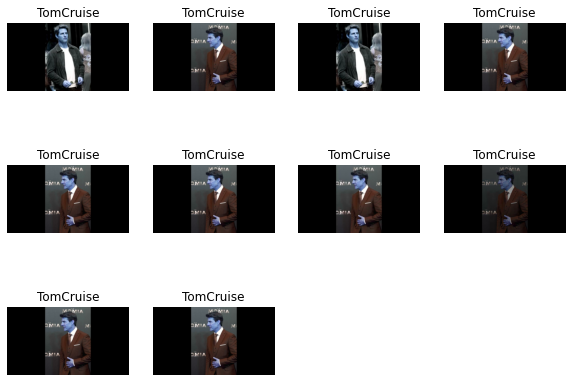

In [176]:
# locationOfImage = 'TestImages/'
locationOfImage = pathTestImagesCruise
imagesT         = os.listdir(locationOfImage)
#random.shuffle modify the original list
random.shuffle(imagesT)
picturePrediction_(locationOfImage,imagesT[:10])

In [2]:
locationOfImage = pathTestImagesHanks
imagesT         = os.listdir(locationOfImage)
random.shuffle(imagesT)
picturePrediction_(locationOfImage,imagesT[:10])

In [148]:
cnn_model.metrics_names

['loss', 'accuracy']

In [99]:
%%capture
!wget !wget https://resize.indiatvnews.com/en/resize/gallery/835_-/2020/07/pjimage-15-1593851856.jpg
!mv pjimage-15-1593851856.jpg imagesTC7.jpg
!mv imagesTC7.jpg TestImages/

# <center> <b>Conclusion</b>

* The model is trained with resnet50 weight and from scratch.

* The training and validation loss and accuracy are the same. However, the model could reproduce the same level of accuracy for the new images that was not provided during training and validation.

* The model has a strong fondness for Tom Hanks and most of Tom Cruise's happy photos are predicted to be Tom Hanks.

* Further research is needed to make the predictive ability as accurate as possible.